In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


m_df = pd.read_csv("desktop/MSU_Data_bootcamp/Movie_analysis/IMDb_movies_cleaned.csv", dtype={"imdb_title_id":str, 'year':str})

mrev_df = pd.read_csv("desktop/MSU_Data_bootcamp/Movie_analysis/mov_opening_rev.csv")

m_df.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,5.9,154,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,1906,12/26/1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,6.1,589,7.0,7.0
2,tt0001892,Den sorte drøm,1911,8/19/1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.8,188,5.0,2.0
3,tt0002101,Cleopatra,1912,11/13/1912,"Drama, History",100,USA,English,Charles L. Gaskill,5.2,446,25.0,3.0
4,tt0002130,L'Inferno,1911,3/6/1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0,2237,31.0,14.0


In [3]:
#this is a calculation of user review stats of movies by genre
g_avg_vote_df = m_df[['genre', 'avg_vote']].copy()

gen_vote_stats = g_avg_vote_df.groupby('genre').agg(
    mean = pd.NamedAgg(column = 'avg_vote', aggfunc = 'mean'),
    median = pd.NamedAgg(column = 'avg_vote', aggfunc = 'median'),
    standard_deviation = pd.NamedAgg(column = 'avg_vote', aggfunc = 'std'),
    movie_count= pd.NamedAgg(column = 'avg_vote', aggfunc = 'count')
)

gvs_means = gen_vote_stats.sort_values(by = ['mean'], ascending = False)

gvs_means

,mean,median,standard_deviation,movie_count
genre,,,,
"Musical, Comedy, Family",8.7,8.7,NaN,1
"Music, Musical",8.5,8.5,NaN,1
"Family, Sci-Fi, Adventure",8.4,8.4,NaN,1
"Fantasy, Musical, Sci-Fi",8.1,8.1,NaN,1
"Fantasy, Drama, Romance",8.0,8.0,NaN,1
...,...,...,...,...
"Horror, Drama, Thriller",2.6,2.6,NaN,1
"Drama, Horror, Reality-TV",2.4,2.4,NaN,1
"Horror, Reality-TV, Thriller",2.1,2.1,NaN,1


In [4]:
#This cell is to identify the most common movie genres and look at their average scores
gvs_counts = gen_vote_stats.sort_values(by = ["movie_count"], ascending = False)

gvs_counts.head(25)

gvs_mc = gvs_counts.head(25).copy()

gvs_mc.sort_values(by = ['mean'], ascending = False)

gvs_mc

,mean,median,standard_deviation,movie_count
genre,,,,
Drama,6.357076,6.50,0.964083,12543
Comedy,5.604745,5.80,1.219596,7693
"Comedy, Drama",6.253033,6.40,0.987685,4039
"Drama, Romance",6.338726,6.50,0.954476,3455
"Comedy, Romance",5.888278,6.00,0.999580,2508
"Comedy, Drama, Romance",6.202922,6.30,0.971382,2293
Horror,4.386199,4.40,1.277780,2268
"Drama, Thriller",5.813353,5.90,1.111070,1348
"Crime, Drama",6.261579,6.40,1.033780,1343


In [5]:
#this is a calculation of user review stats of movies by country
c_avg_vote_df = m_df[['country', 'avg_vote']].copy()

con_vote_stats = c_avg_vote_df.groupby('country').agg(
    mean = pd.NamedAgg(column = 'avg_vote', aggfunc = 'mean'),
    median = pd.NamedAgg(column = 'avg_vote', aggfunc = 'median'),
    standard_deviation = pd.NamedAgg(column = 'avg_vote', aggfunc = 'std'),
    movie_count= pd.NamedAgg(column = 'avg_vote', aggfunc = 'count')
)

cs_means = con_vote_stats.sort_values(by = ['mean'], ascending = False)

cs_means

,mean,median,standard_deviation,movie_count
country,,,,
"Republic of North Macedonia, Poland",8.5,8.5,NaN,1
"USA, UK, Malta, Morocco",8.5,8.5,NaN,1
"UK, France, Poland, Germany, USA",8.5,8.5,NaN,1
"Romania, France, Italy",8.4,8.4,NaN,1
"Lebanon, USA, France, Cyprus, Qatar, UK",8.4,8.4,NaN,1
...,...,...,...,...
"France, Spain, Belgium, Canada, Mexico",1.6,1.6,NaN,1
"Italy, USA, Spain",1.6,1.6,NaN,1
"USA, Australia, India, Hong Kong, UK",1.5,1.5,NaN,1


In [6]:
#This cell is to identify the most common movie genres and look at their average scores
cs_counts = con_vote_stats.sort_values(by = ["movie_count"], ascending = False)

cs_counts.head(25)

cs_mc = cs_counts.head(25).copy()

cs_mc

,mean,median,standard_deviation,movie_count
country,,,,
USA,5.556084,5.8,1.284809,28511
India,6.224880,6.5,1.425698,6065
UK,5.781099,6.0,1.234406,4111
Japan,6.536334,6.7,0.968778,3077
France,6.108838,6.2,0.932513,3055
Italy,5.818044,6.0,1.078479,2444
Canada,5.403718,5.5,1.264684,1802
Germany,5.913324,6.1,1.123625,1396
Turkey,5.791488,6.1,1.472793,1351


In [7]:
#looking at average vote by year
#this sort operation revealed an abberant value preventing year from being a numeric data type
time_df= m_df[['year', 'avg_vote']].copy()

t_df = time_df.groupby('year').mean()

t_df.sort_values(by = 'avg_vote')

t_df

,avg_vote
year,
1894,5.900000
1906,6.100000
1911,6.140000
1912,5.980000
1913,6.546154
...,...
2017,5.696786
2018,5.688609
2019,5.791271


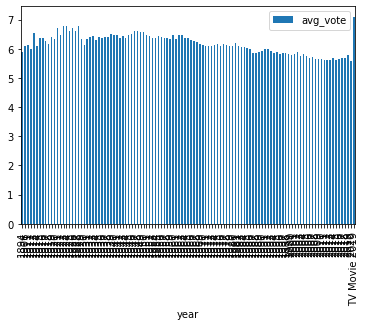

In [8]:
#average score grouped by year


t_df.plot(kind = "bar")

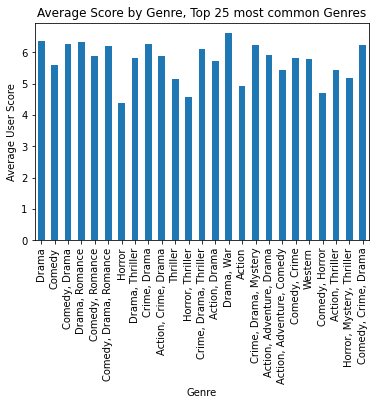

In [9]:
#genre plot

g_plot = gvs_mc[['mean']].copy()

g_plot.plot(kind = "bar", legend = False)

plt.title('Average Score by Genre, Top 25 most common Genres')
plt.ylabel("Average User Score")
plt.xlabel('Genre')
plt.show()

In [10]:
#this is the row with a screwy year value mentioned above

m_df.loc[m_df['year'] == 'TV Movie 2019']

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
83917,tt8206668,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,7.1,23973,135.0,98.0


In [11]:
#Replacing the bad value with an appropriate one

m_df.replace('TV Movie 2019', '2019', inplace = True)

m_df.iloc[83917]

imdb_title_id                          tt8206668
title                              Bad Education
year                                        2019
date_published                              2019
genre                   Biography, Comedy, Crime
duration                                     108
country                                      USA
language                                 English
director                             Cory Finley
avg_vote                                     7.1
votes                                      23973
reviews_from_users                           135
reviews_from_critics                          98
Name: 83917, dtype: object

In [12]:
m_df.astype({'year':'int'}).dtypes

imdb_title_id            object
title                    object
year                      int32
date_published           object
genre                    object
duration                  int64
country                  object
language                 object
director                 object
avg_vote                float64
votes                     int64
reviews_from_users      float64
reviews_from_critics    float64
dtype: object

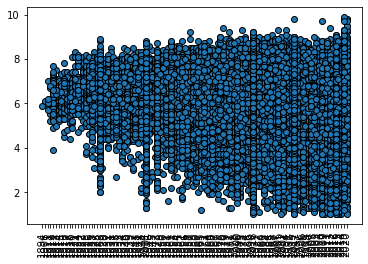

<Figure size 57600x7200 with 0 Axes>

In [13]:
#attempting to plot year by average vote in a scatter plot

plt.scatter(m_df['year'], m_df['avg_vote'], edgecolors = 'black')

plt.xticks(rotation = 'vertical')

plt.figure(figsize = (800, 100))

plt.show()

In [14]:
#looking at average vote by year
#this sort operation revealed an abberant value preventing year from being a numeric data type
time_df= m_df[['year', 'avg_vote']].copy()

t_df = time_df.groupby('year').mean()

t_df.sort_values(by = 'avg_vote')

t_df

,avg_vote
year,
1894,5.900000
1906,6.100000
1911,6.140000
1912,5.980000
1913,6.546154
...,...
2016,5.658062
2017,5.696786
2018,5.688609


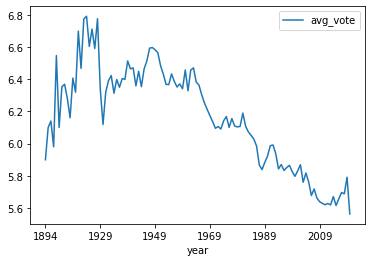

In [15]:
#average score grouped by year


t_df.plot(kind = "line")

In [16]:
#looking at average vote by year
#this sort operation revealed an abberant value preventing year from being a numeric data type
time_tots_df= m_df[['year', 'votes']].copy()

t2_df = time_tots_df.groupby('year').mean()

t2_df

,votes
year,
1894,154.000000
1906,589.000000
1911,566.600000
1912,331.600000
1913,756.000000
...,...
2016,9227.565328
2017,7598.147492
2018,6593.286767


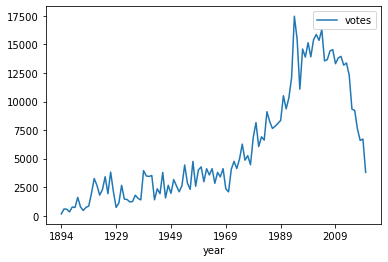

In [17]:
t2_df.plot(kind = "line")

In [18]:
gvs_counts.head(50)

,mean,median,standard_deviation,movie_count
genre,,,,
Drama,6.357076,6.50,0.964083,12543
Comedy,5.604745,5.80,1.219596,7693
"Comedy, Drama",6.253033,6.40,0.987685,4039
"Drama, Romance",6.338726,6.50,0.954476,3455
"Comedy, Romance",5.888278,6.00,0.999580,2508
"Comedy, Drama, Romance",6.202922,6.30,0.971382,2293
Horror,4.386199,4.40,1.277780,2268
"Drama, Thriller",5.813353,5.90,1.111070,1348
"Crime, Drama",6.261579,6.40,1.033780,1343


In [19]:
#Genres Anova
#setting dfs of movies by single component genre and average vote

horror_df = m_df[m_df['genre']=="Horror"]['avg_vote']
drama_df = m_df[m_df['genre']=="Drama"]['avg_vote']
comedy_df = m_df[m_df['genre']=="Comedy"]['avg_vote']
action_df = m_df[m_df['genre']=="Action"]['avg_vote']
western_df = m_df[m_df['genre']=="Western"]['avg_vote']
thriller_df = m_df[m_df['genre']=="Thriller"]['avg_vote']
romance_df = m_df[m_df['genre']=="Romance"]['avg_vote']

st.f_oneway(horror_df, drama_df, comedy_df, action_df, western_df, thriller_df, romance_df)

F_onewayResult(statistic=1338.7481140365946, pvalue=0.0)

In [20]:
genre_plot = {
    "Horror":horror_df, "Drama": drama_df, "Comedy": comedy_df,
    "Action":action_df, "Western":western_df, "Thriller": thriller_df, 
    "Romance": romance_df
}

gp_df = pd.DataFrame(data = genre_plot)

gp_df

,Horror,Drama,Comedy,Action,Western,Thriller,Romance
0,NaN,NaN,NaN,NaN,NaN,NaN,5.9
2,NaN,5.8,NaN,NaN,NaN,NaN,NaN
9,NaN,5.5,NaN,NaN,NaN,NaN,NaN
10,NaN,6.6,NaN,NaN,NaN,NaN,NaN
12,NaN,7.1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
85847,NaN,7.4,NaN,NaN,NaN,NaN,NaN
85848,NaN,8.8,NaN,NaN,NaN,NaN,NaN
85850,NaN,NaN,5.3,NaN,NaN,NaN,NaN
85852,NaN,7.9,NaN,NaN,NaN,NaN,NaN


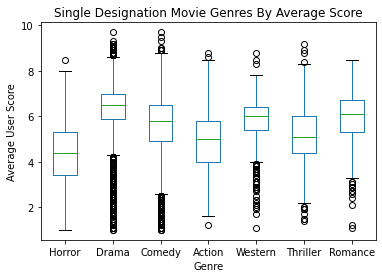

In [21]:
#boxplot for single designation movie genres

boxplot = gp_df.boxplot(grid = False)

plt.title('Single Designation Movie Genres By Average Score')
plt.ylabel('Average User Score')
plt.xlabel('Genre')

plt.show()

Text(0.5, 0, 'Average User Score')

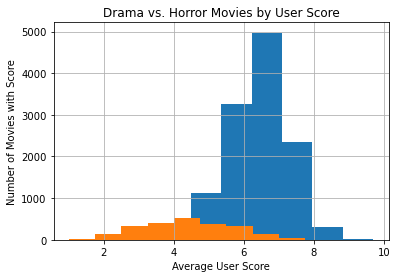

In [22]:
#histograms of horror and drama movie scores
drama_df.hist()
horror_df.hist()
plt.title('Drama vs. Horror Movies by User Score')
plt.ylabel('Number of Movies with Score')
plt.xlabel('Average User Score')

In [23]:
mrev_df.head()

,Year,Film,Opening,Weekend,Distributor,Budget
0,1983,Star Wars: Episode VI - Return of the Jedi,59305165,May 27-30,20th Century Fox,32500000.0
1,1983,Superman III,56837690,Jul 1-4,Warner Bros.,39000000.0
2,1983,Jaws 3D,52212400,Jul 22-24,Universal Pictures,20500000.0
3,1984,Indiana Jones and the Temple of Doom,62680115,May 25-28,Paramount Pictures,28000000.0
4,1984,Star Trek III: The Search for Spock,50208004,May 25-28,Paramount Pictures,17000000.0


In [24]:
#merging the financial information with the IMDb dataframe information

mrev_df.rename(columns = {"Film":"title"}, inplace = True)

m_combine = pd.merge(mrev_df, m_df, on= "title")

m_combine.head()

,Year,title,Opening,Weekend,Distributor,Budget,imdb_title_id,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
0,1983,Superman III,56837690,Jul 1-4,Warner Bros.,39000000.0,tt0086393,1983,6/17/1983,"Action, Adventure, Comedy",125,"UK, USA","English, Italian, Spanish",Richard Lester,5.0,63179,262.0,119.0
1,1984,Ghostbusters,60535933,Jun 8-10,Columbia Pictures,30000000.0,tt1289401,2016,7/28/2016,"Action, Comedy, Fantasy",117,"USA, Australia",English,Paul Feig,5.2,200067,2203.0,689.0
2,1988,Cocktail,50052220,Jul 29-31,Walt Disney,20000000.0,tt0094889,1988,1/18/1989,"Comedy, Drama, Romance",104,"USA, Canada","English, Spanish Sign Language",Roger Donaldson,5.9,77870,130.0,60.0
3,1988,Cocktail,50052220,Jul 29-31,Walt Disney,20000000.0,tt1821373,2010,10/22/2010,"Drama, Musical, Thriller",111,India,Malayalam,Arun Kumar,7.2,782,4.0,NaN
4,1988,Cocktail,50052220,Jul 29-31,Walt Disney,20000000.0,tt2168910,2012,7/13/2012,"Comedy, Drama, Romance",146,"UK, India",Hindi,Homi Adajania,6.3,13100,64.0,33.0


In [25]:
#setting year values as floats so that they can be numeric
m_combine = m_combine.astype({'year':'float64', 'Year':'float64'})



In [26]:
#checking on data types
m_combine.dtypes

Year                    float64
title                    object
Opening                   int64
Weekend                  object
Distributor              object
Budget                  float64
imdb_title_id            object
year                    float64
date_published           object
genre                    object
duration                  int64
country                  object
language                 object
director                 object
avg_vote                float64
votes                     int64
reviews_from_users      float64
reviews_from_critics    float64
dtype: object

In [27]:
#using the two year columns to filter merge errors
m_combine_f = m_combine[m_combine['Year'] == m_combine['year']]
m_combine_f




,Year,title,Opening,Weekend,Distributor,Budget,imdb_title_id,year,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
0,1983.0,Superman III,56837690,Jul 1-4,Warner Bros.,39000000.0,tt0086393,1983.0,6/17/1983,"Action, Adventure, Comedy",125,"UK, USA","English, Italian, Spanish",Richard Lester,5.0,63179,262.0,119.0
2,1988.0,Cocktail,50052220,Jul 29-31,Walt Disney,20000000.0,tt0094889,1988.0,1/18/1989,"Comedy, Drama, Romance",104,"USA, Canada","English, Spanish Sign Language",Roger Donaldson,5.9,77870,130.0,60.0
7,1989.0,Batman,93294088,Jun 23-25,Warner Bros.,35000000.0,tt0096895,1989.0,10/20/1989,"Action, Adventure",126,"USA, UK","English, French, Spanish",Tim Burton,7.5,332356,934.0,229.0
8,1989.0,Harlem Nights,52044039,Nov 17-19,Paramount Pictures,30000000.0,tt0097481,1989.0,11/17/1989,"Comedy, Crime, Drama",116,USA,English,Eddie Murphy,6.1,19829,75.0,26.0
11,1990.0,Dick Tracy,67952401,Jun 15-17,Walt Disney,47000000.0,tt0099422,1990.0,10/5/1990,"Action, Comedy, Crime",105,USA,English,Warren Beatty,6.1,56659,194.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,2019.0,Spider-Man: Far from Home,174209668,Jul 5-7,Sony Pictures,160000000.0,tt6320628,2019.0,7/10/2019,"Action, Adventure, Sci-Fi",129,USA,"English, Italian, Czech",Jon Watts,7.5,304708,2041.0,415.0
443,2019.0,Downton Abbey,113373910,Sep 20-22,Focus Features,13000000.0,tt6398184,2019.0,10/24/2019,"Drama, Romance",122,"UK, USA",English,Michael Engler,7.4,35846,441.0,174.0
449,2019.0,Joker,142713298,Oct 4-6,Warner Bros.,55000000.0,tt7286456,2019.0,10/3/2019,"Crime, Drama, Thriller",122,"USA, Canada",English,Todd Phillips,8.5,855097,10472.0,698.0
450,2019.0,Midway,100490654,Nov 8-10,Lionsgate,100000000.0,tt6924650,2019.0,11/27/2019,"Action, Adventure, Drama",138,"China, Hong Kong, Canada, USA","English, Japanese, Mandarin",Roland Emmerich,6.7,57789,946.0,174.0


In [28]:
#getting rid of redundant year columns

m_combine_f = m_combine_f.drop('year', 1)

m_combine_f

,Year,title,Opening,Weekend,Distributor,Budget,imdb_title_id,date_published,genre,duration,country,language,director,avg_vote,votes,reviews_from_users,reviews_from_critics
0,1983.0,Superman III,56837690,Jul 1-4,Warner Bros.,39000000.0,tt0086393,6/17/1983,"Action, Adventure, Comedy",125,"UK, USA","English, Italian, Spanish",Richard Lester,5.0,63179,262.0,119.0
2,1988.0,Cocktail,50052220,Jul 29-31,Walt Disney,20000000.0,tt0094889,1/18/1989,"Comedy, Drama, Romance",104,"USA, Canada","English, Spanish Sign Language",Roger Donaldson,5.9,77870,130.0,60.0
7,1989.0,Batman,93294088,Jun 23-25,Warner Bros.,35000000.0,tt0096895,10/20/1989,"Action, Adventure",126,"USA, UK","English, French, Spanish",Tim Burton,7.5,332356,934.0,229.0
8,1989.0,Harlem Nights,52044039,Nov 17-19,Paramount Pictures,30000000.0,tt0097481,11/17/1989,"Comedy, Crime, Drama",116,USA,English,Eddie Murphy,6.1,19829,75.0,26.0
11,1990.0,Dick Tracy,67952401,Jun 15-17,Walt Disney,47000000.0,tt0099422,10/5/1990,"Action, Comedy, Crime",105,USA,English,Warren Beatty,6.1,56659,194.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,2019.0,Spider-Man: Far from Home,174209668,Jul 5-7,Sony Pictures,160000000.0,tt6320628,7/10/2019,"Action, Adventure, Sci-Fi",129,USA,"English, Italian, Czech",Jon Watts,7.5,304708,2041.0,415.0
443,2019.0,Downton Abbey,113373910,Sep 20-22,Focus Features,13000000.0,tt6398184,10/24/2019,"Drama, Romance",122,"UK, USA",English,Michael Engler,7.4,35846,441.0,174.0
449,2019.0,Joker,142713298,Oct 4-6,Warner Bros.,55000000.0,tt7286456,10/3/2019,"Crime, Drama, Thriller",122,"USA, Canada",English,Todd Phillips,8.5,855097,10472.0,698.0
450,2019.0,Midway,100490654,Nov 8-10,Lionsgate,100000000.0,tt6924650,11/27/2019,"Action, Adventure, Drama",138,"China, Hong Kong, Canada, USA","English, Japanese, Mandarin",Roland Emmerich,6.7,57789,946.0,174.0


In [29]:
#write data set out to csv

m_combine_f.to_csv('Desktop/financials_w_IMDB.csv', index = False)

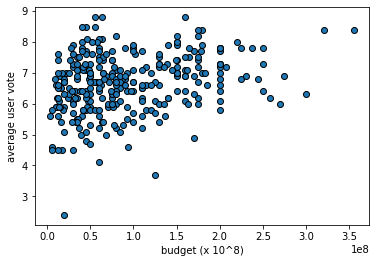

In [30]:
#scatter plot to look for correlation between budget and user rating

plt.scatter(m_combine_f['Budget'], m_combine_f['avg_vote'], edgecolors = "black")
plt.ylabel('average user vote')
plt.xlabel('budget (x 10^8)')
plt.show()

#r_val = st.pearsonr(m_combine_f['Budget'], m_combine_f['avg_vote'])
# must drop null vals for regression

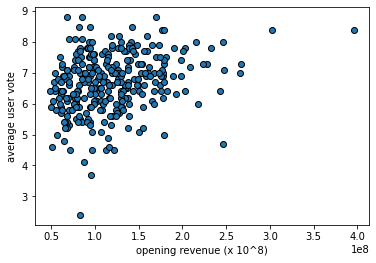

The correlation is 0.2763124303220398


In [31]:
#scatter plot to look at opening revenue vs vote counts 

plt.scatter(m_combine_f['Opening '], m_combine_f['avg_vote'], edgecolors = "black")
plt.ylabel('average user vote')
plt.xlabel('opening revenue (x 10^8)')
plt.show()

r_val = st.pearsonr(m_combine_f['Opening '], m_combine_f['avg_vote'])

print(f'The correlation is {r_val[0]}')

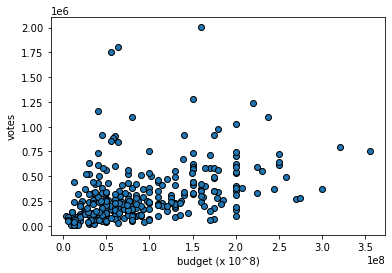

In [32]:
#plot to look at vote counts and budget

plt.scatter(m_combine_f['Budget'], m_combine_f['votes'], edgecolors = "black")
plt.ylabel('votes')
plt.xlabel('budget (x 10^8)')
plt.show()

#r_val = st.pearsonr(m_combine_f['Budget'], m_combine_f['votes'])
#print(f'The correlation is {r_val[0]}')



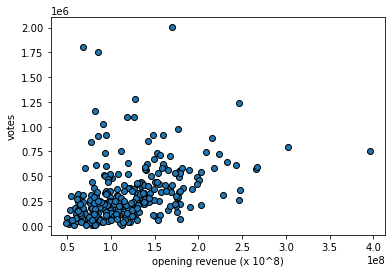

The correlation is 0.3851983241112993


In [33]:
plt.scatter(m_combine_f['Opening '], m_combine_f['votes'], edgecolors = "black")
plt.ylabel('votes')
plt.xlabel('opening revenue (x 10^8)')
plt.show()

r_val = st.pearsonr(m_combine_f['Opening '], m_combine_f['votes'])

print(f'The correlation is {r_val[0]}')

In [34]:
m_df.to_csv('desktop/IMDb_fixed_years.csv', index = False)